In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('Salesdata.csv',parse_dates=['DateKey','Invoice Date','Promised Delivery Date'])
data

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10025248,2017-05-23,340.8400,2017-05-23,100080,P01,61762,Carlson Blueberry Yogurt,2000,803.8600,200086,2017-05-23,463.02,803.8600,0.00,463.02,463.020,1,145,EA
1,10025063,2017-06-02,16812.4800,2017-06-02,100093,NaN,62058,Big Time Popsicles,2000,1293.0000,200101,2017-05-29,14219.52,31032.0000,0.00,14219.52,592.480,24,162,EA
2,10025549,2017-06-02,195.3900,2017-06-02,100094,P01,24335,Kiwi Scallops,2000,217.1000,200105,2017-06-02,238.81,434.2000,0.00,238.81,119.405,2,103,EA
3,10002489,2017-06-03,-211.7500,2017-06-03,100096,P03,NaN,Kiwi Lox,1000,0.0000,200107,2017-06-03,211.75,0.0000,0.00,211.75,211.750,1,160,EA
4,10015824,2017-06-12,317.4600,2017-06-12,100130,P01,31682,Golden Waffles,15000,317.4600,200143,2017-06-12,317.46,634.9200,0.00,317.46,158.730,2,103,EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65275,10025025,2019-05-11,1327.1200,2019-05-11,332837,P01,17801,Better Fancy Canned Sardines,4000,1431.2300,126601,2019-05-11,1535.34,2862.4600,899.38,635.96,767.670,2,110,EA
65276,10020181,2019-05-11,639.8200,2019-05-11,332840,P01,17801,Better Fancy Canned Sardines,3000,1431.2300,126609,2019-05-11,791.41,1431.2300,449.69,341.72,791.410,1,115,EA
65277,10020181,2019-05-11,1028.5798,2019-05-11,332840,P01,31875,Golden Frozen Chicken Thighs,2000,1150.4399,126609,2019-05-11,1272.30,2300.8798,640.09,632.21,636.150,2,115,EA
65278,10020181,2019-05-11,1121.3398,2019-05-11,332840,P01,37441,Atomic Mint Chocolate Bar,1000,1254.1899,126609,2019-05-11,1387.04,2508.3798,688.55,698.49,693.520,2,115,EA


In [4]:
#checking shape
data.shape

(65280, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           65280 non-null  int64         
 1   DateKey                           65280 non-null  datetime64[ns]
 2   Discount Amount                   65278 non-null  float64       
 3   Invoice Date                      65280 non-null  datetime64[ns]
 4   Invoice Number                    65280 non-null  int64         
 5   Item Class                        56995 non-null  object        
 6   Item Number                       65240 non-null  object        
 7   Item                              65280 non-null  object        
 8   Line Number                       65280 non-null  int64         
 9   List Price                        65280 non-null  float64       
 10  Order Number                      65280 non-nu

In [6]:
data.columns

Index(['Custkey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [7]:
#copying the data
df=data.copy()

In [8]:
#checking null values
df.isnull().sum()

Custkey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8285
Item Number                           40
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [9]:
df['Item Class'].value_counts()

P01    56965
PO1       16
P03        1
P15        1
P06        1
P12        1
P13        1
P04        1
P05        1
P14        1
P11        1
P08        1
P07        1
P10        1
P09        1
P02        1
Name: Item Class, dtype: int64

In [10]:
#droping null values columns
df.dropna(subset=['Item Number','Discount Amount','Sales Price'],inplace=True)

In [11]:
df.describe()

,Custkey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.524000e+04,65240.000000,65240.000000,65240.000000,65240.000000,65240.000000,65240.000000,65240.000000,65240.000000,65240.000000,65240.000000,65240.000000,65240.000000
mean,1.001770e+07,1857.332863,216294.567259,23725.376180,515.021356,180567.311695,2853.161197,4710.494059,1662.048528,1191.112669,283.253429,45.107357,137.421735
std,7.175892e+03,9039.603327,94981.656013,32669.704672,449.146853,67612.713894,15169.133687,20702.762126,9559.467966,5862.610381,250.449245,429.796995,26.644355
min,1.000045e+07,-255820.800000,100080.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000,103.000000
25%,1.001272e+07,246.280000,117969.750000,3000.000000,181.560000,115281.000000,308.362500,561.040000,167.810000,129.890000,100.030000,2.000000,113.000000
50%,1.001966e+07,442.205000,222906.000000,12000.000000,325.190000,203695.000000,553.940000,999.750000,304.580000,246.480000,183.283929,3.000000,134.000000
75%,1.002351e+07,1001.500000,314325.000000,32000.000000,803.860000,218576.000000,1279.752500,2321.400000,688.550000,578.220000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [12]:
#spliting the data into year month day and quater
df['Invoice_Year']=df['Invoice Date'].dt.year
df['Invoice_Month']=df['Invoice Date'].dt.month
df['Invoice_Day']=df['Invoice Date'].dt.day
df['Invoice_Quarter']=df['Invoice Date'].dt.quarter

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65240 entries, 0 to 65279
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           65240 non-null  int64         
 1   DateKey                           65240 non-null  datetime64[ns]
 2   Discount Amount                   65240 non-null  float64       
 3   Invoice Date                      65240 non-null  datetime64[ns]
 4   Invoice Number                    65240 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65240 non-null  object        
 7   Item                              65240 non-null  object        
 8   Line Number                       65240 non-null  int64         
 9   List Price                        65240 non-null  float64       
 10  Order Number                      65240 non-nu

In [14]:
#selecting needed data for data Analysis 
df1=df[['Custkey','Item','Invoice Date','Invoice_Year','Invoice_Month','Invoice_Day',
        'Invoice_Quarter','Sales Quantity','Sales Amount Based on List Price','Discount Amount',
        'Sales Amount','Sales Cost Amount','Sales Margin Amount','Sales Rep','U/M','List Price','Sales Price']]

In [15]:
df1

,Custkey,Item,Invoice Date,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Quarter,Sales Quantity,Sales Amount Based on List Price,Discount Amount,Sales Amount,Sales Cost Amount,Sales Margin Amount,Sales Rep,U/M,List Price,Sales Price
0,10025248,Carlson Blueberry Yogurt,2017-05-23,2017,5,23,2,1,803.8600,340.8400,463.02,0.00,463.02,145,EA,803.8600,463.020
1,10025063,Big Time Popsicles,2017-06-02,2017,6,2,2,24,31032.0000,16812.4800,14219.52,0.00,14219.52,162,EA,1293.0000,592.480
2,10025549,Kiwi Scallops,2017-06-02,2017,6,2,2,2,434.2000,195.3900,238.81,0.00,238.81,103,EA,217.1000,119.405
4,10015824,Golden Waffles,2017-06-12,2017,6,12,2,2,634.9200,317.4600,317.46,0.00,317.46,103,EA,317.4600,158.730
5,10022431,Gorilla 1% Milk,2017-06-12,2017,6,12,2,1,577.4600,244.8400,332.62,0.00,332.62,113,EA,577.4600,332.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65275,10025025,Better Fancy Canned Sardines,2019-05-11,2019,5,11,2,2,2862.4600,1327.1200,1535.34,899.38,635.96,110,EA,1431.2300,767.670
65276,10020181,Better Fancy Canned Sardines,2019-05-11,2019,5,11,2,1,1431.2300,639.8200,791.41,449.69,341.72,115,EA,1431.2300,791.410
65277,10020181,Golden Frozen Chicken Thighs,2019-05-11,2019,5,11,2,2,2300.8798,1028.5798,1272.30,640.09,632.21,115,EA,1150.4399,636.150
65278,10020181,Atomic Mint Chocolate Bar,2019-05-11,2019,5,11,2,2,2508.3798,1121.3398,1387.04,688.55,698.49,115,EA,1254.1899,693.520


<AxesSubplot: >

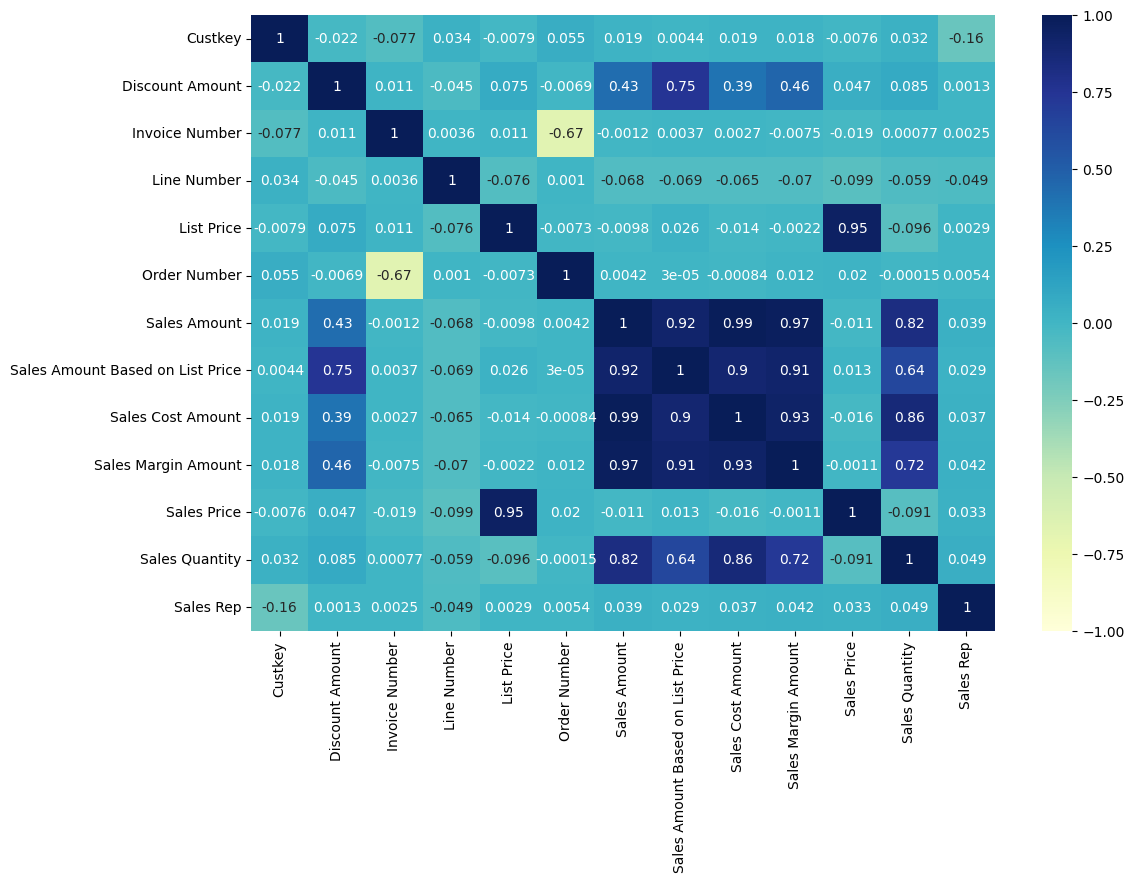

In [16]:
#Checking Correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='pearson'),annot=True,vmin=-1,vmax=1,cmap='YlGnBu')



### Observations:

* Discount Amount is highly related to Sales Amount, Sales Cost Amount, Sales Amount Based on List Price & Sales Margin Amount and moderately related to Sales Quantity.
* Sales quantity is moderately related to Sales amount, discount amount, sales margin amount.
* Their is no relation Between Sales Rep and Sales Amount, Sales Margin Amount.
* There is no relation between the list price sales quantity, sales amount,sales cost amount.
* the list price is highly related to sales price.


In [17]:
sns.set(style='darkgrid')
Daysales=df1.copy()
Daysales['Invoice_Date']=pd.to_datetime(df['Invoice Date']).dt.date

In [18]:
top_ten_sales=Daysales.groupby('Invoice_Date').sum().sort_values('Sales Amount',ascending=False)
top_ten_sales=top_ten_sales.reset_index().head(10)

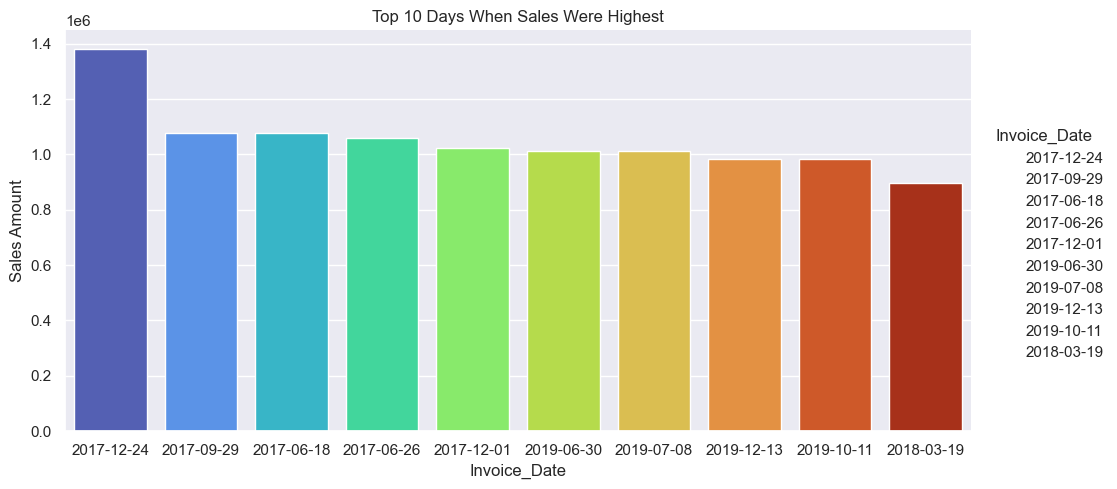

In [19]:
sns.catplot(y = 'Sales Amount', x = 'Invoice_Date', data = top_ten_sales, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Sales Were Highest')
top_ten_sales[['Sales Amount']]
plt.show()

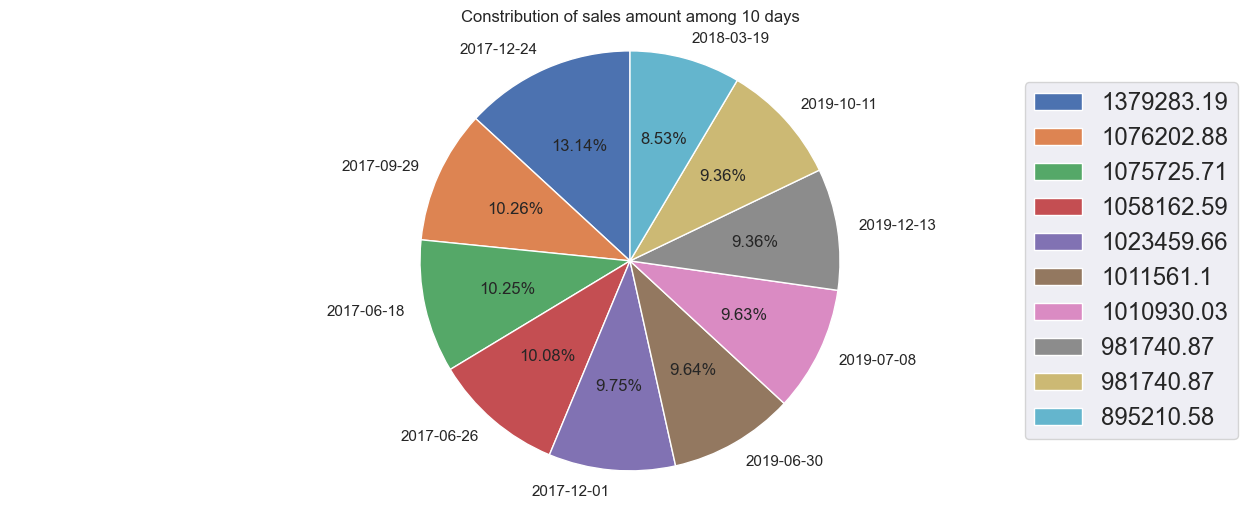

In [20]:
plt.figure(figsize=(16,6))
plt.pie('Sales Amount', labels='Invoice_Date',data=top_ten_sales,autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.title('Constribution of sales amount among 10 days')
plt.legend(round(top_ten_sales['Sales Amount'],2),loc=7,fontsize='x-large')
plt.show()

In [21]:
top10prof=Daysales.groupby('Invoice_Date').sum().sort_values('Sales Margin Amount',ascending=False)
top10prof=top10prof.reset_index().head(10)

0    619085.33
1    480769.87
2    477173.34
3    450965.94
4    436621.64
5    413530.29
6    406118.86
7    398430.22
8    398222.72
9    392326.13
Name: Sales Margin Amount, dtype: float64

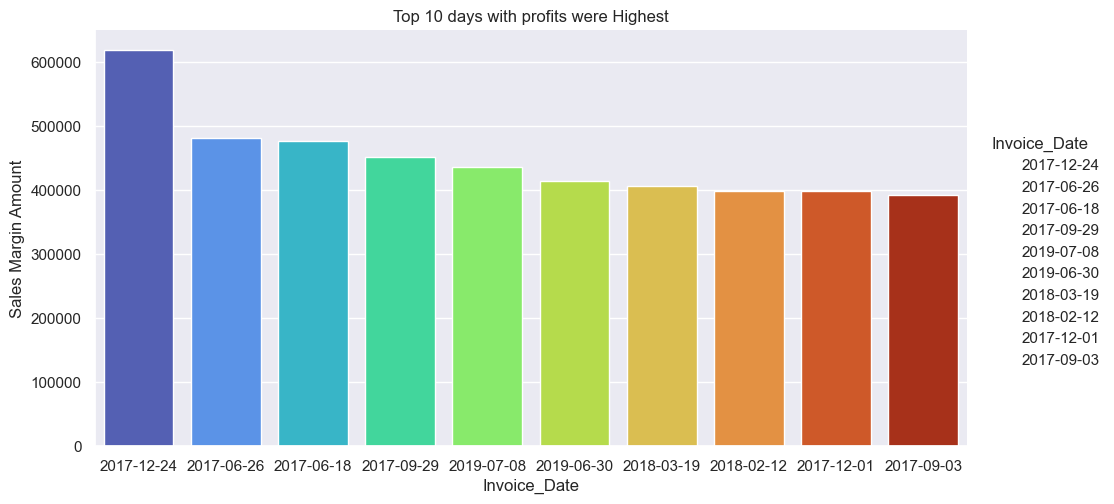

In [22]:
sns.catplot(x='Invoice_Date',y='Sales Margin Amount',data=top10prof,aspect=2,palette='turbo',kind='bar')
plt.title("Top 10 days with profits were Highest")
top10prof['Sales Margin Amount']

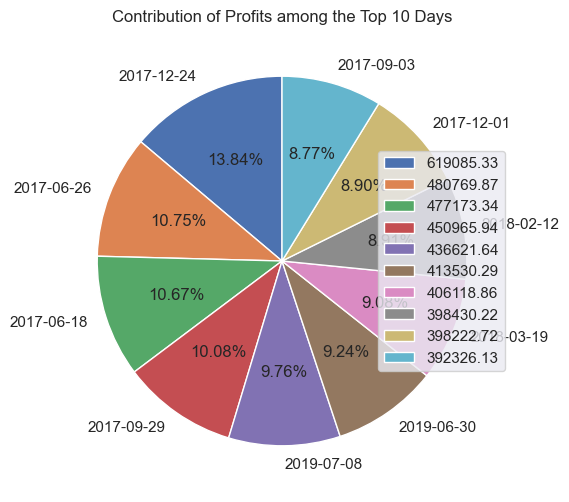

In [23]:
plt.figure(figsize=(18,6))
plt.pie('Sales Margin Amount', labels='Invoice_Date', data=top10prof,autopct='%1.2f%%',startangle=90)
plt.title("Contribution of Profits among the Top 10 Days")
plt.legend(round(top10prof['Sales Margin Amount'],2),loc=7)
plt.show()

In [24]:
higest_Quan=Daysales.groupby('Invoice_Date').sum().sort_values('Sales Quantity',ascending=False)
higest_Quan=higest_Quan.reset_index().head(10)



0    23710
1    23708
2    17822
3    17820
4    17819
5    17819
6    17819
7    17819
8    17819
9    17649
Name: Sales Quantity, dtype: int64

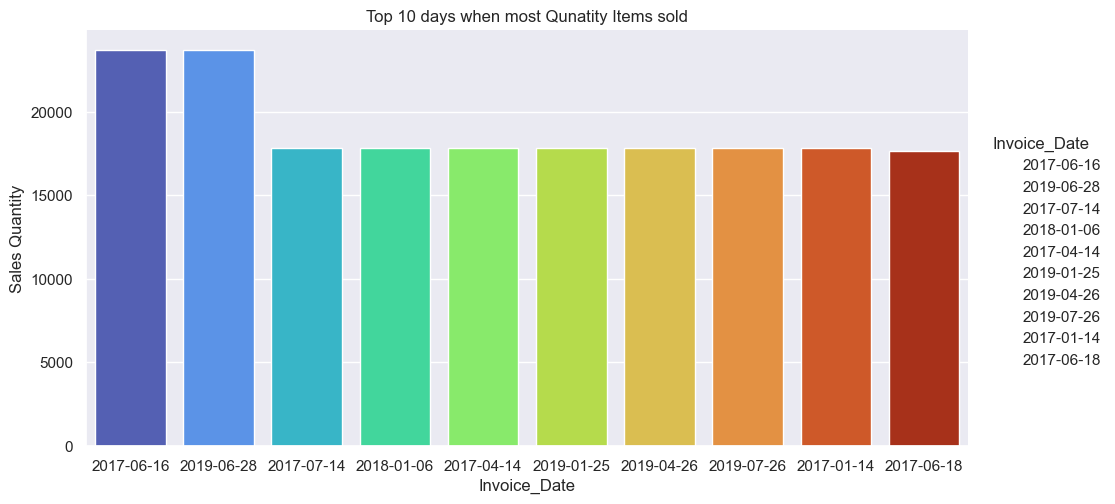

In [25]:
sns.catplot(y='Sales Quantity',x='Invoice_Date', data=higest_Quan,aspect=2,palette='turbo',kind='bar')
plt.title('Top 10 days when most Qunatity Items sold')
higest_Quan['Sales Quantity']


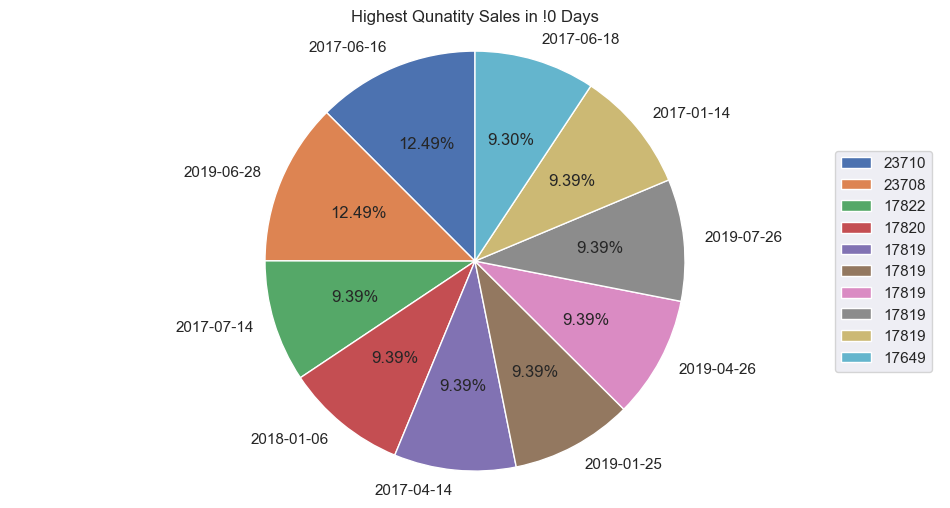

In [26]:
plt.figure(figsize=(12,6))
plt.pie('Sales Quantity',labels='Invoice_Date', data=higest_Quan,autopct='%1.2f%%',startangle=90)
plt.title("Highest Qunatity Sales in !0 Days")
plt.axis('equal')
plt.legend(round(higest_Quan['Sales Quantity'],2),loc=7)
plt.show()

In [27]:
Daysales.head()

,Custkey,Item,Invoice Date,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Quarter,Sales Quantity,Sales Amount Based on List Price,Discount Amount,Sales Amount,Sales Cost Amount,Sales Margin Amount,Sales Rep,U/M,List Price,Sales Price,Invoice_Date
0,10025248,Carlson Blueberry Yogurt,2017-05-23,2017,5,23,2,1,803.86,340.84,463.02,0.0,463.02,145,EA,803.86,463.020,2017-05-23
1,10025063,Big Time Popsicles,2017-06-02,2017,6,2,2,24,31032.00,16812.48,14219.52,0.0,14219.52,162,EA,1293.00,592.480,2017-06-02
2,10025549,Kiwi Scallops,2017-06-02,2017,6,2,2,2,434.20,195.39,238.81,0.0,238.81,103,EA,217.10,119.405,2017-06-02
4,10015824,Golden Waffles,2017-06-12,2017,6,12,2,2,634.92,317.46,317.46,0.0,317.46,103,EA,317.46,158.730,2017-06-12
5,10022431,Gorilla 1% Milk,2017-06-12,2017,6,12,2,1,577.46,244.84,332.62,0.0,332.62,113,EA,577.46,332.620,2017-06-12


In [28]:
MostCust=Daysales.groupby(['Invoice_Date']).count().sort_values('Custkey',ascending=False)
MostCust=MostCust.reset_index().head(10)

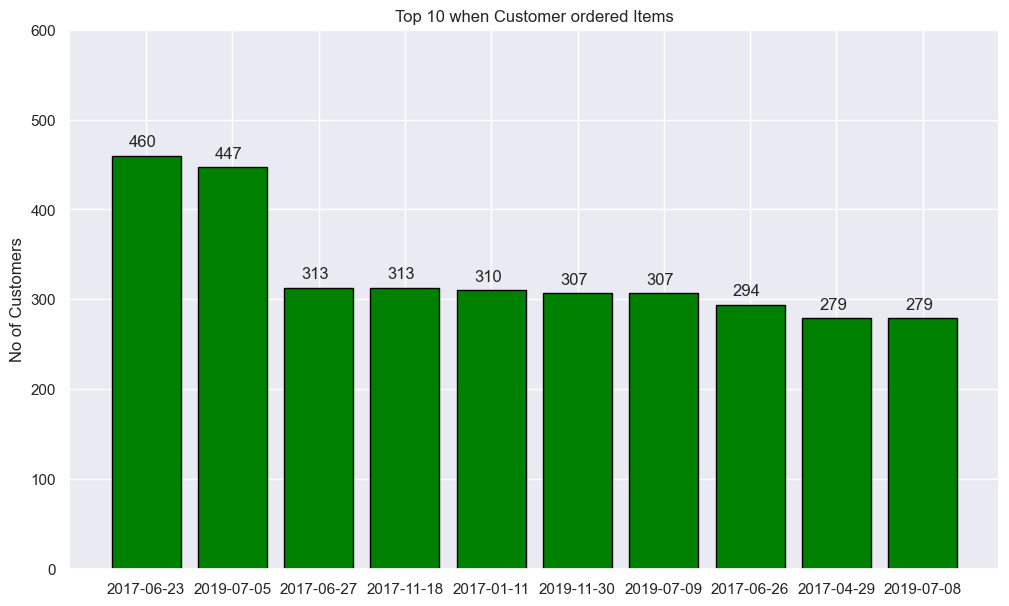

In [29]:
s=list(range(10))
plt.figure(figsize=(12,7))
plt.bar(s,MostCust['Custkey'],label='Custkey',color='green',edgecolor='black')
plt.title("Top 10 when Customer ordered Items")
plt.ylabel('No of Customers')
plt.ylim(0,600)
for i,val in enumerate(MostCust['Invoice Date']):
    plt.annotate(xy=[s[i]-0.2,int(val)+10],text=int(val))
plt.xticks(s,MostCust['Invoice_Date'])
plt.show()

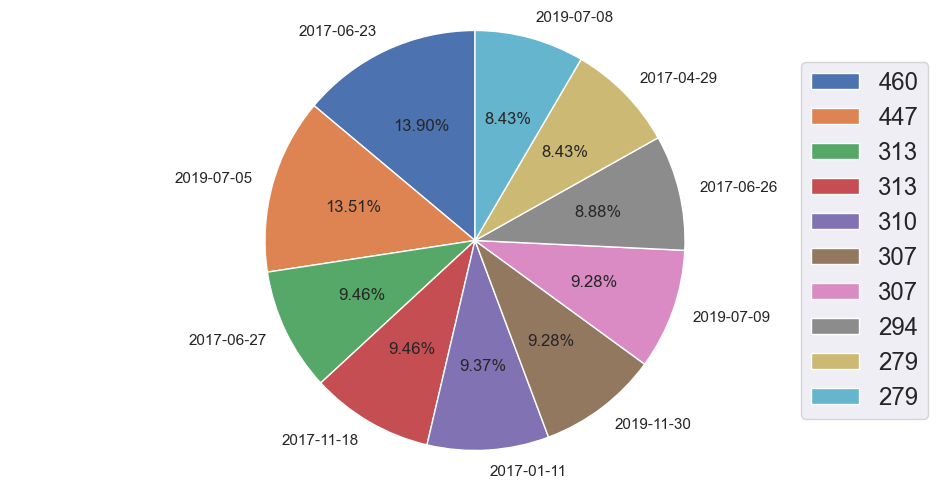

In [30]:
plt.figure(figsize=(12,6))
plt.pie(x='Custkey',labels='Invoice_Date',data=MostCust,autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.legend(MostCust['Custkey'],loc=7,fontsize='x-large')
plt.show()

## Yearly Sales Analysis

In [31]:
Year_Sales=df1[['Custkey','Item','Invoice Date','Invoice_Year','Invoice_Month',
                            'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]


Text(0.5, 1.0, 'Yearly Sales')

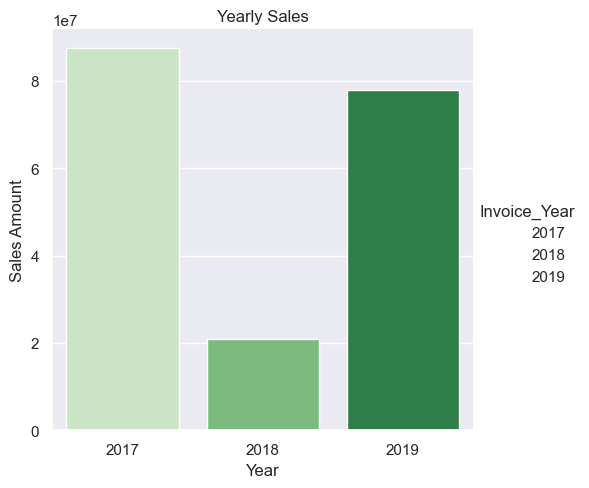

In [32]:
Sales_amount_Yearly=Year_Sales.groupby('Invoice_Year').sum().reset_index()
sns.catplot(x='Invoice_Year',y='Sales Amount',data=Sales_amount_Yearly,kind='bar',palette='Greens')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')


<AxesSubplot: xlabel='Invoice_Month', ylabel='Sales Amount'>

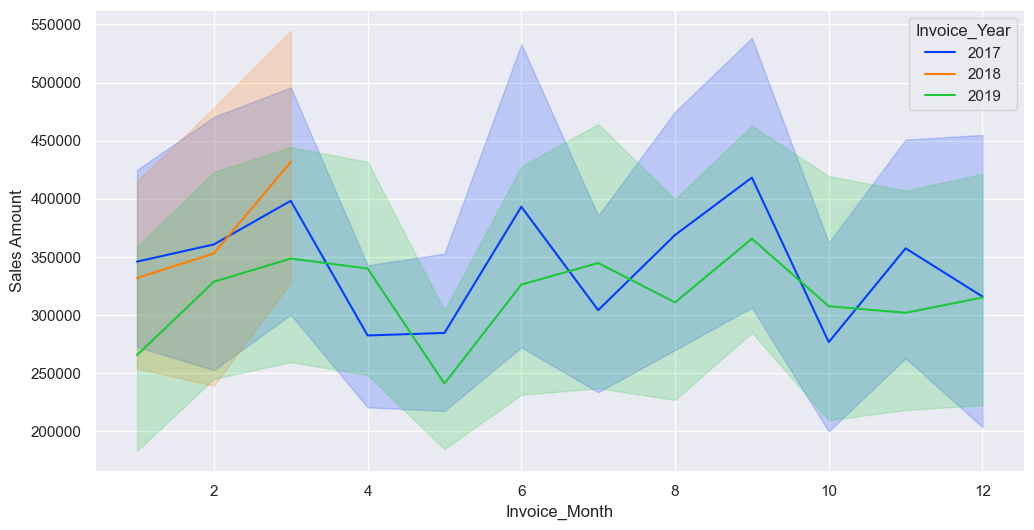

In [33]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Invoice_Month',y='Sales Amount',data=df1.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(),
             hue='Invoice_Year', palette='bright')

From above observation we can say that the sales decreased from 2017 and again started increased from 2018 and 2019

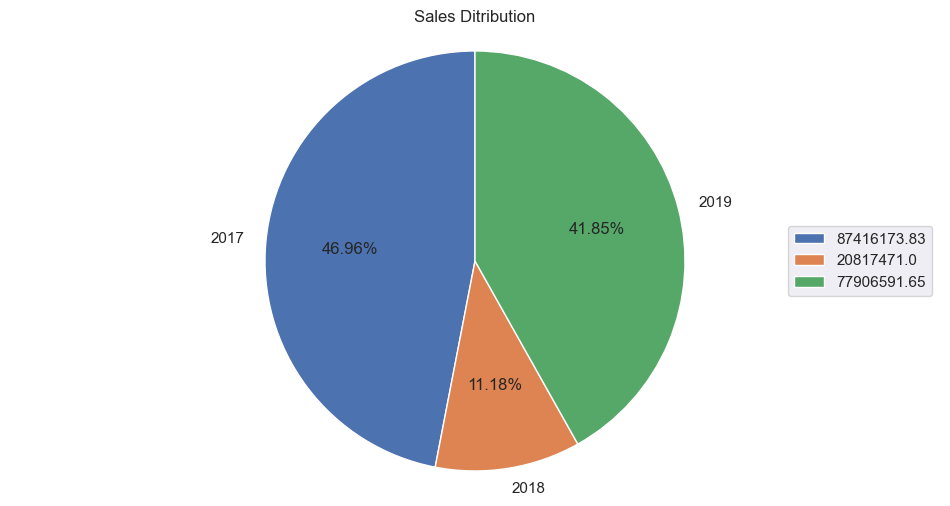

In [34]:
plt.figure(figsize=(12,6))
plt.pie('Sales Amount', data=Sales_amount_Yearly,labels='Invoice_Year',autopct='%1.2f%%',startangle=90)
plt.title('Sales Ditribution')
plt.axis('equal')
plt.legend(round(Sales_amount_Yearly['Sales Amount'],2),loc=7)
plt.show()

Text(0, 0.5, 'Count')

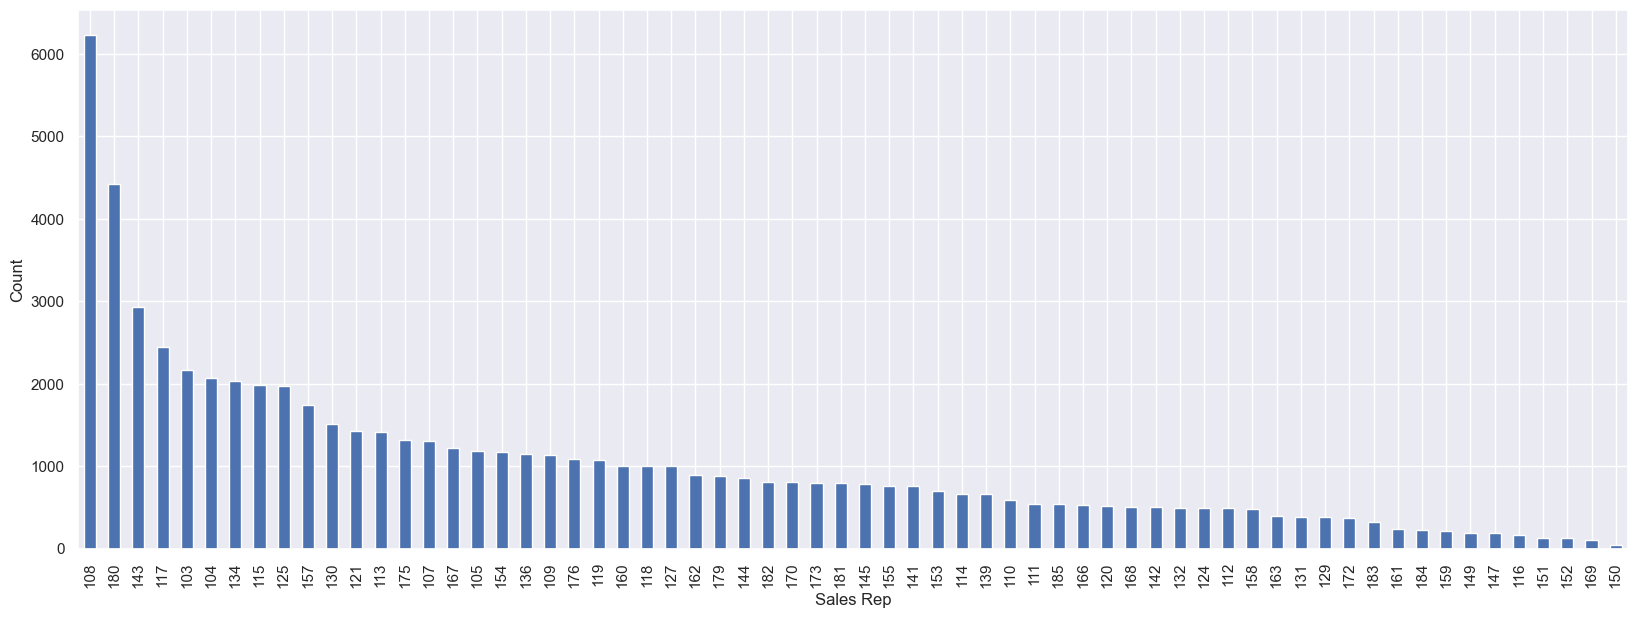

In [35]:
plt.figure(figsize=(20,7))
df['Sales Rep'].value_counts().plot.bar()
plt.xlabel('Sales Rep')
plt.ylabel('Count')


## Yearly -Monthly Records

In [36]:
year_month_rec=df1.groupby(['Invoice_Year','Invoice_Month']).sum().reset_index()
year_month_rec

,Invoice_Year,Invoice_Month,Custkey,Invoice_Day,Invoice_Quarter,Sales Quantity,Sales Amount Based on List Price,Discount Amount,Sales Amount,Sales Cost Amount,Sales Margin Amount,Sales Rep,List Price,Sales Price
0,2017,1,27720114193,42970,2767,136996,1.392720e+07,5.276745e+06,8650450.48,5041841.82,3608608.66,380529,1.428805e+06,781317.138966
1,2017,2,21327328268,33637,2129,119580,1.213592e+07,4.919596e+06,7216327.65,4157899.24,3058428.41,296186,1.074272e+06,600460.161868
2,2017,3,26189152009,45283,2614,113618,1.276287e+07,5.195345e+06,7567525.47,4329221.84,3238303.63,357123,1.354211e+06,741311.980740
3,2017,4,18934747118,33521,3780,87772,8.198891e+06,2.548257e+06,5650633.87,3238634.81,2411999.06,262163,9.369893e+05,535481.873362
4,2017,5,27339723236,44309,5458,103213,8.220900e+06,2.242399e+06,5978501.45,3365217.15,2613284.30,372377,1.329339e+06,795260.797856
5,2017,6,28862153215,48642,5762,138006,1.346621e+07,4.815936e+06,8650271.80,4938489.91,3711781.89,387706,1.492108e+06,836629.974845
6,2017,7,20727915272,38547,6207,101920,9.563048e+06,3.173145e+06,6389903.37,3655676.62,2734226.75,285619,1.074960e+06,605878.934620
7,2017,8,24403341628,42190,7308,124151,1.307420e+07,5.327562e+06,7746639.77,4434205.45,3312434.32,338284,1.228349e+06,694170.910154
8,2017,9,29514781975,49449,8838,128547,1.472000e+07,5.936256e+06,8783739.49,4976120.11,3807619.38,404161,1.558636e+06,873625.957968
9,2017,10,26177813987,46747,10452,84484,1.162379e+07,5.258025e+06,6365760.02,3677192.57,2688567.45,355590,1.329173e+06,736641.961958


Text(1019.050925925926, 0.5, 'Sales Amount')

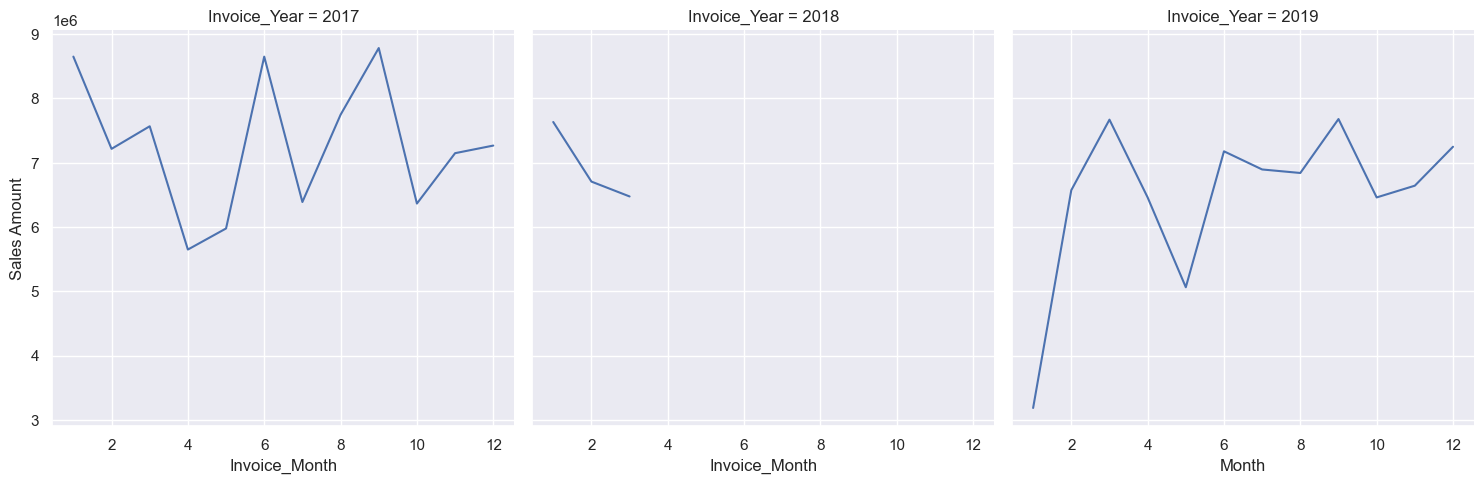

In [37]:
sns.relplot(x='Invoice_Month',y='Sales Amount',data=year_month_rec,height=5,kind='line',aspect=1,col='Invoice_Year')
plt.xlabel("Month")
plt.ylabel("Sales Amount")


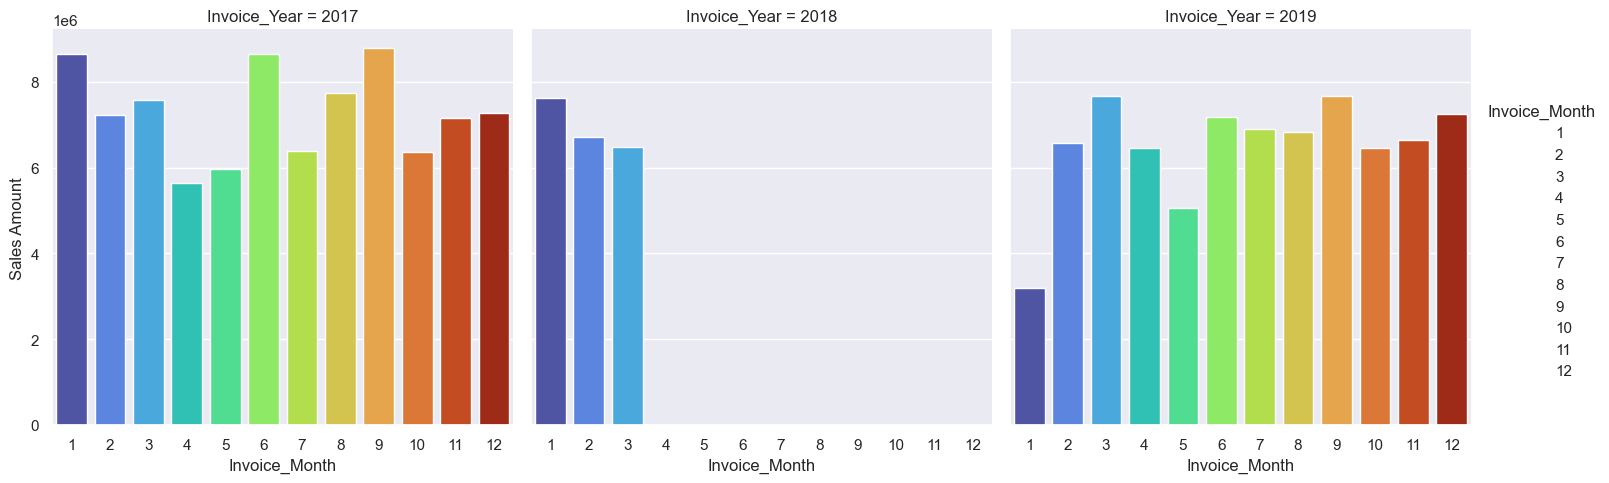

In [38]:
sns.catplot(x='Invoice_Month',y='Sales Amount',data=year_month_rec,palette='turbo',kind='bar',col='Invoice_Year',col_wrap=3)
plt.show()

## Monthly Records

In [39]:
Monthly_rec=df1.groupby(['Invoice_Year','Invoice_Month','Invoice_Day']).sum().reset_index()
Monthly_rec

,Invoice_Year,Invoice_Month,Invoice_Day,Custkey,Invoice_Quarter,Sales Quantity,Sales Amount Based on List Price,Discount Amount,Sales Amount,Sales Cost Amount,Sales Margin Amount,Sales Rep,List Price,Sales Price
0,2017,1,1,721151278,72,3022,7.847990e+05,255945.1240,528853.87,262892.08,265961.79,10546,41374.9035,24766.771905
1,2017,1,2,1142153568,114,1778,3.043512e+05,139904.2508,164446.90,84487.08,79959.82,14635,51952.5400,28650.913811
2,2017,1,3,1432445638,143,2365,3.734792e+05,186704.3056,186774.92,110554.05,76220.87,18019,70159.5632,35821.444693
3,2017,1,4,951603156,95,6406,5.259410e+05,258445.1999,267495.78,159368.14,108127.64,12368,39809.5144,20092.994016
4,2017,1,5,761243878,76,9554,1.622254e+06,822053.0148,800201.03,496892.54,303308.49,10436,43581.6206,22946.008315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2019,12,27,530855035,212,1736,4.919032e+05,258041.6075,233861.61,146082.94,87778.67,7229,31147.1740,16808.055767
554,2019,12,28,1432216013,572,3322,5.742374e+05,268724.5793,305512.79,192065.93,113446.86,21471,78792.0304,41656.977095
555,2019,12,29,1522882579,608,6239,5.271619e+05,216241.8382,310920.03,180639.09,130280.94,20483,84846.5337,44409.376980
556,2019,12,30,1582467196,632,2173,4.587186e+05,211845.3990,246873.23,144627.56,102245.67,19528,84515.5404,43698.268504


Text(2035.0138888888887, 0.5, 'Sales Amount')

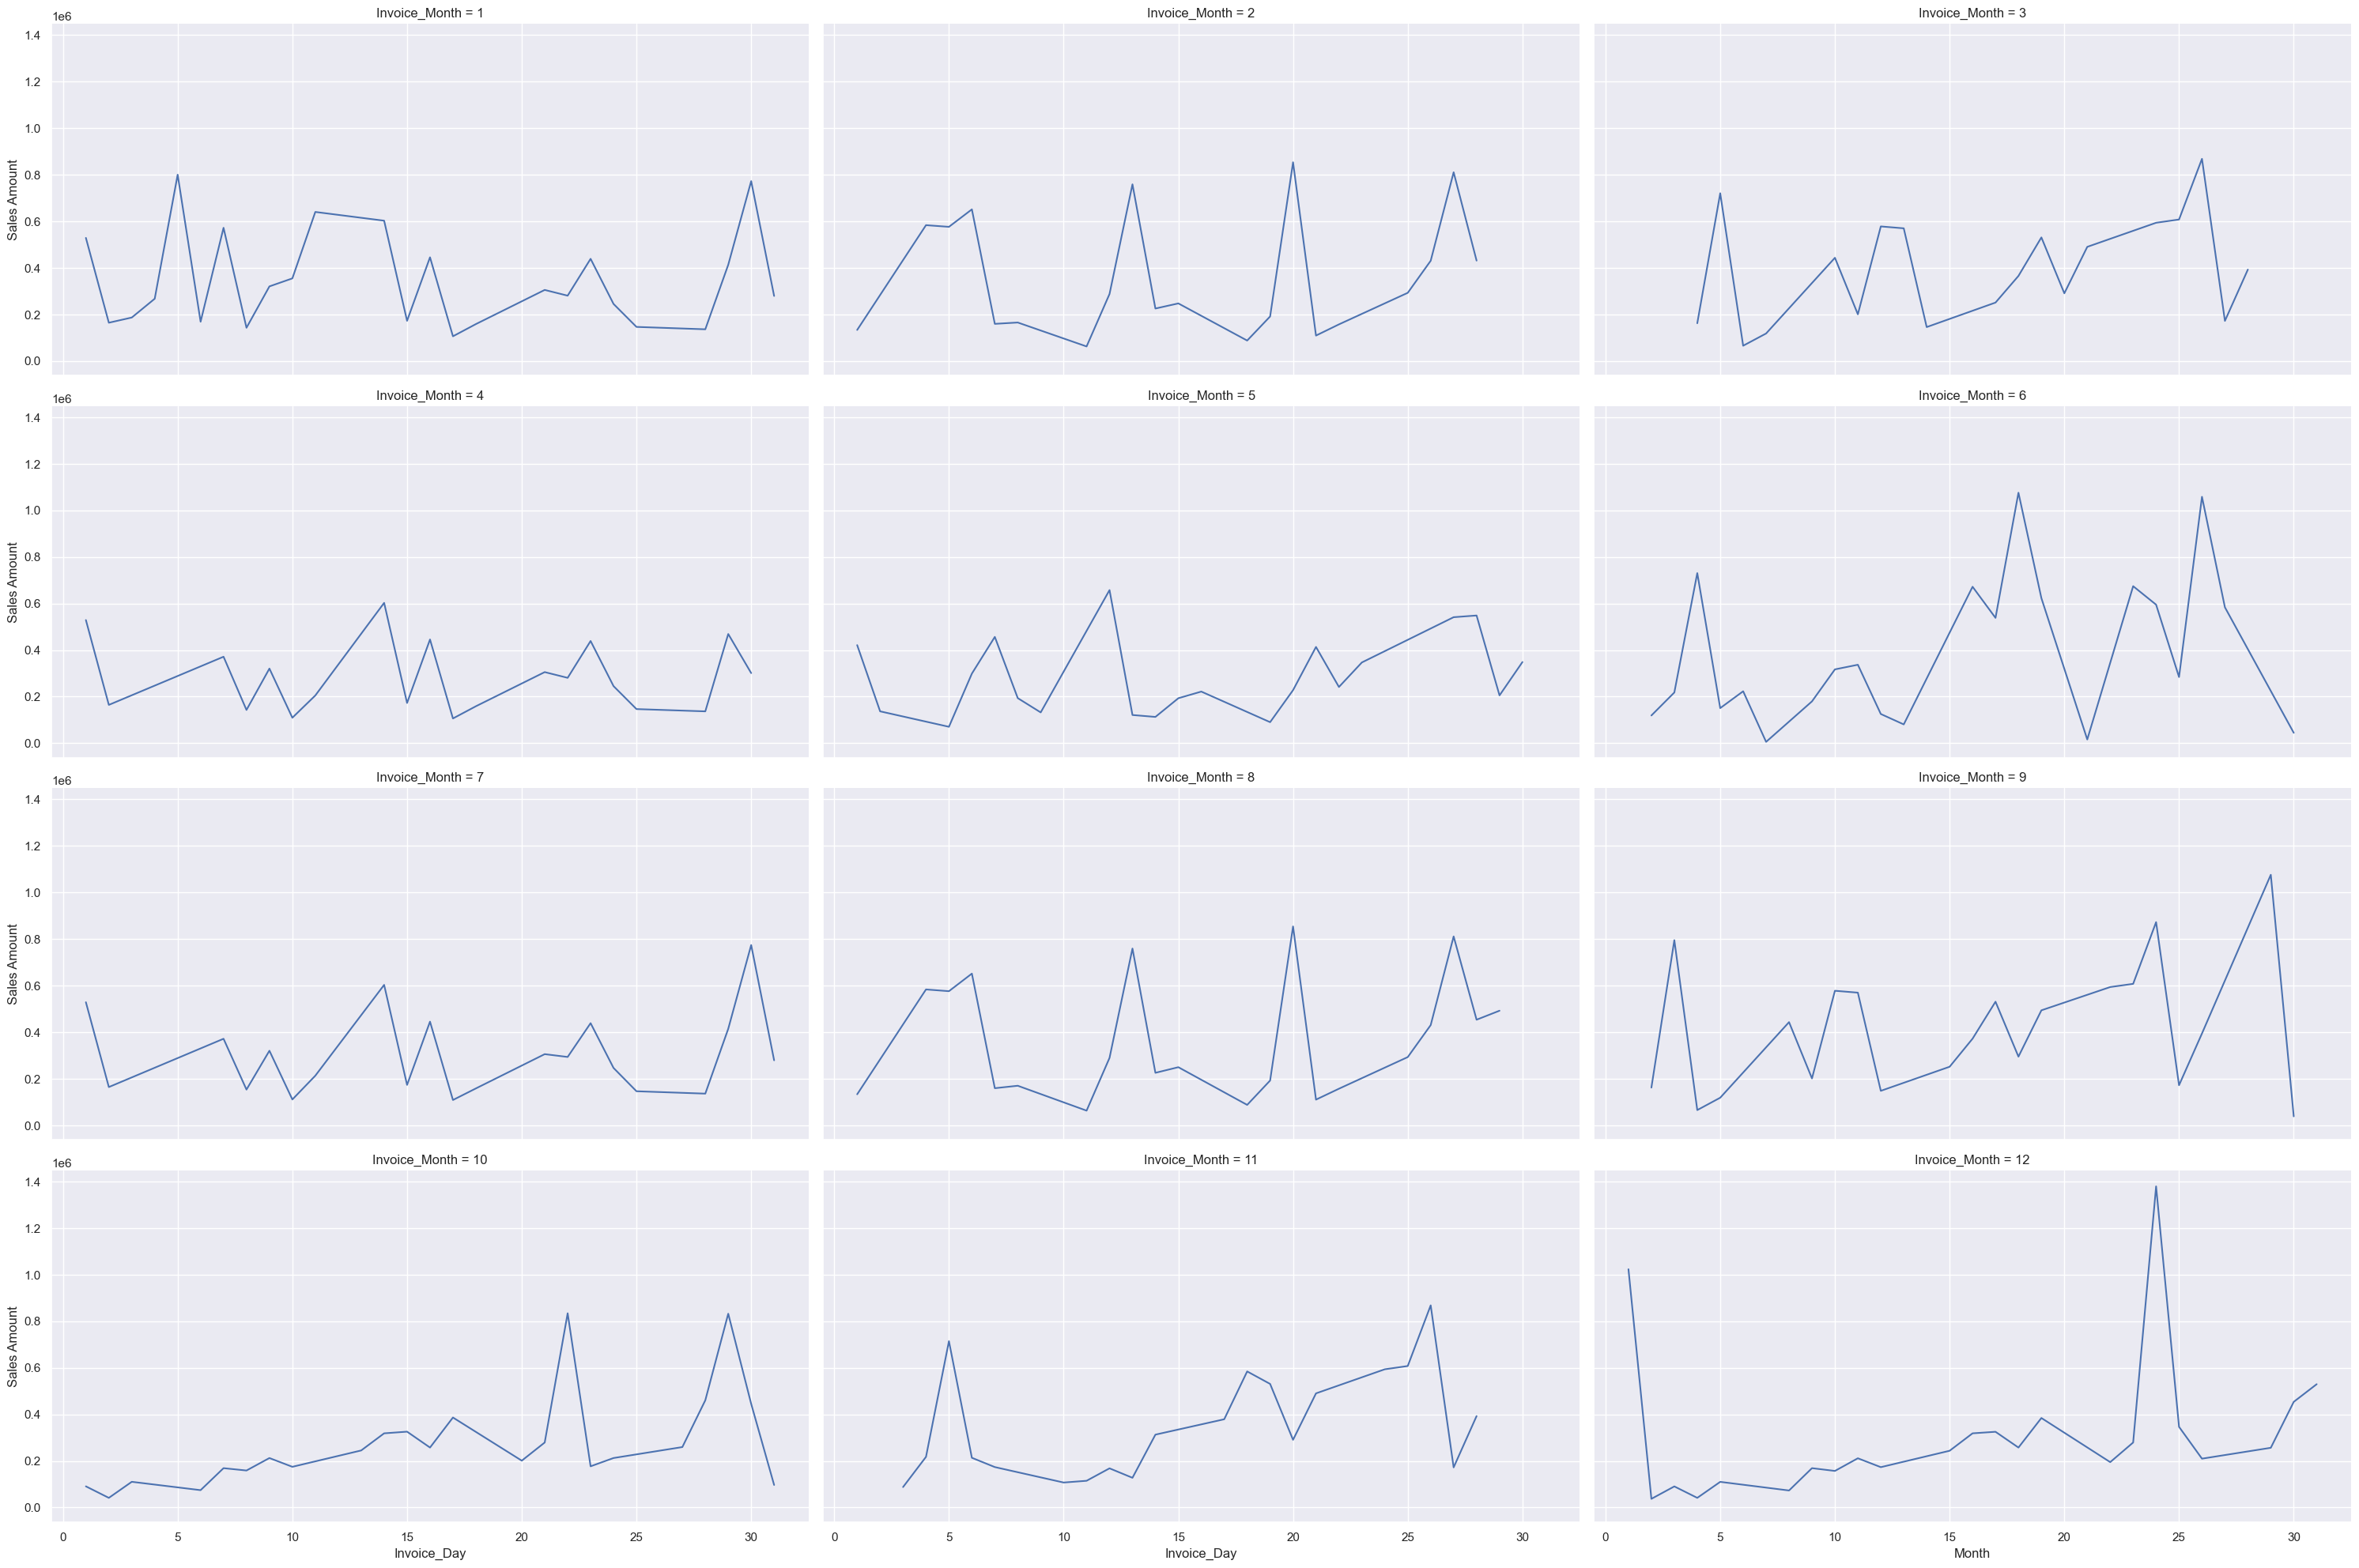

In [40]:
sns.relplot(x='Invoice_Day',y='Sales Amount',data=Monthly_rec.query('Invoice_Year==2017'),
            kind='line',aspect=2,col='Invoice_Month',col_wrap=3)
plt.xlabel("Month")
plt.ylabel("Sales Amount")

Text(1383.5138888888885, 0.5, 'Sales Amount')

<Figure size 800x2000 with 0 Axes>

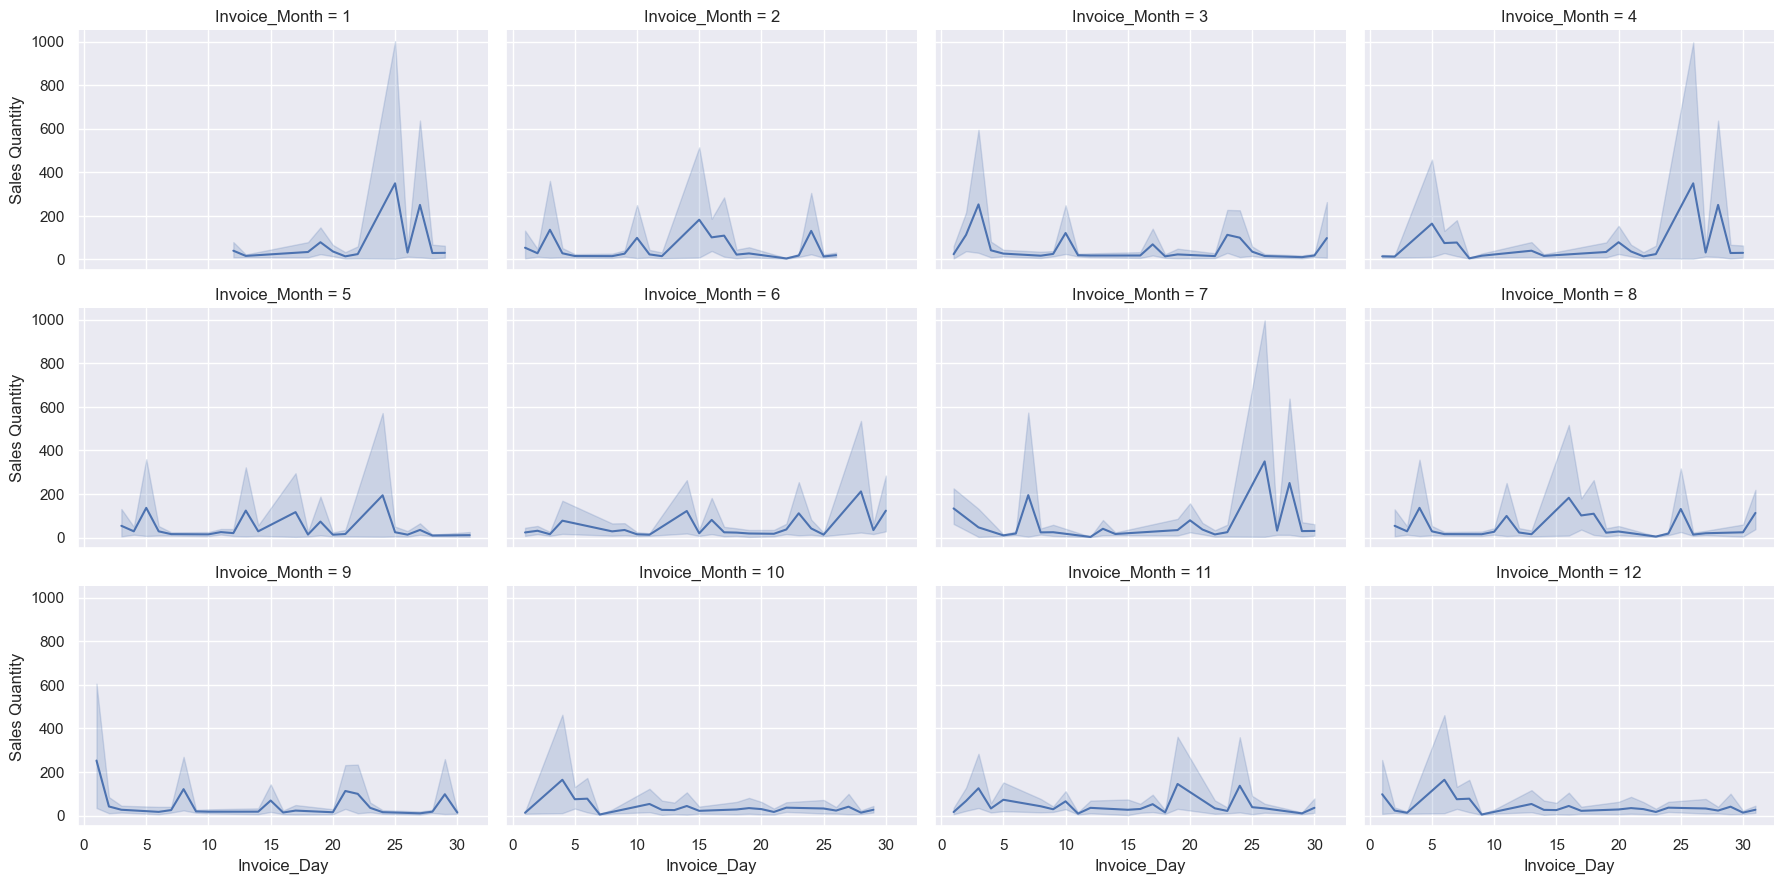

In [41]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Quantity', data= df1.query('Invoice_Year == 2019'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')

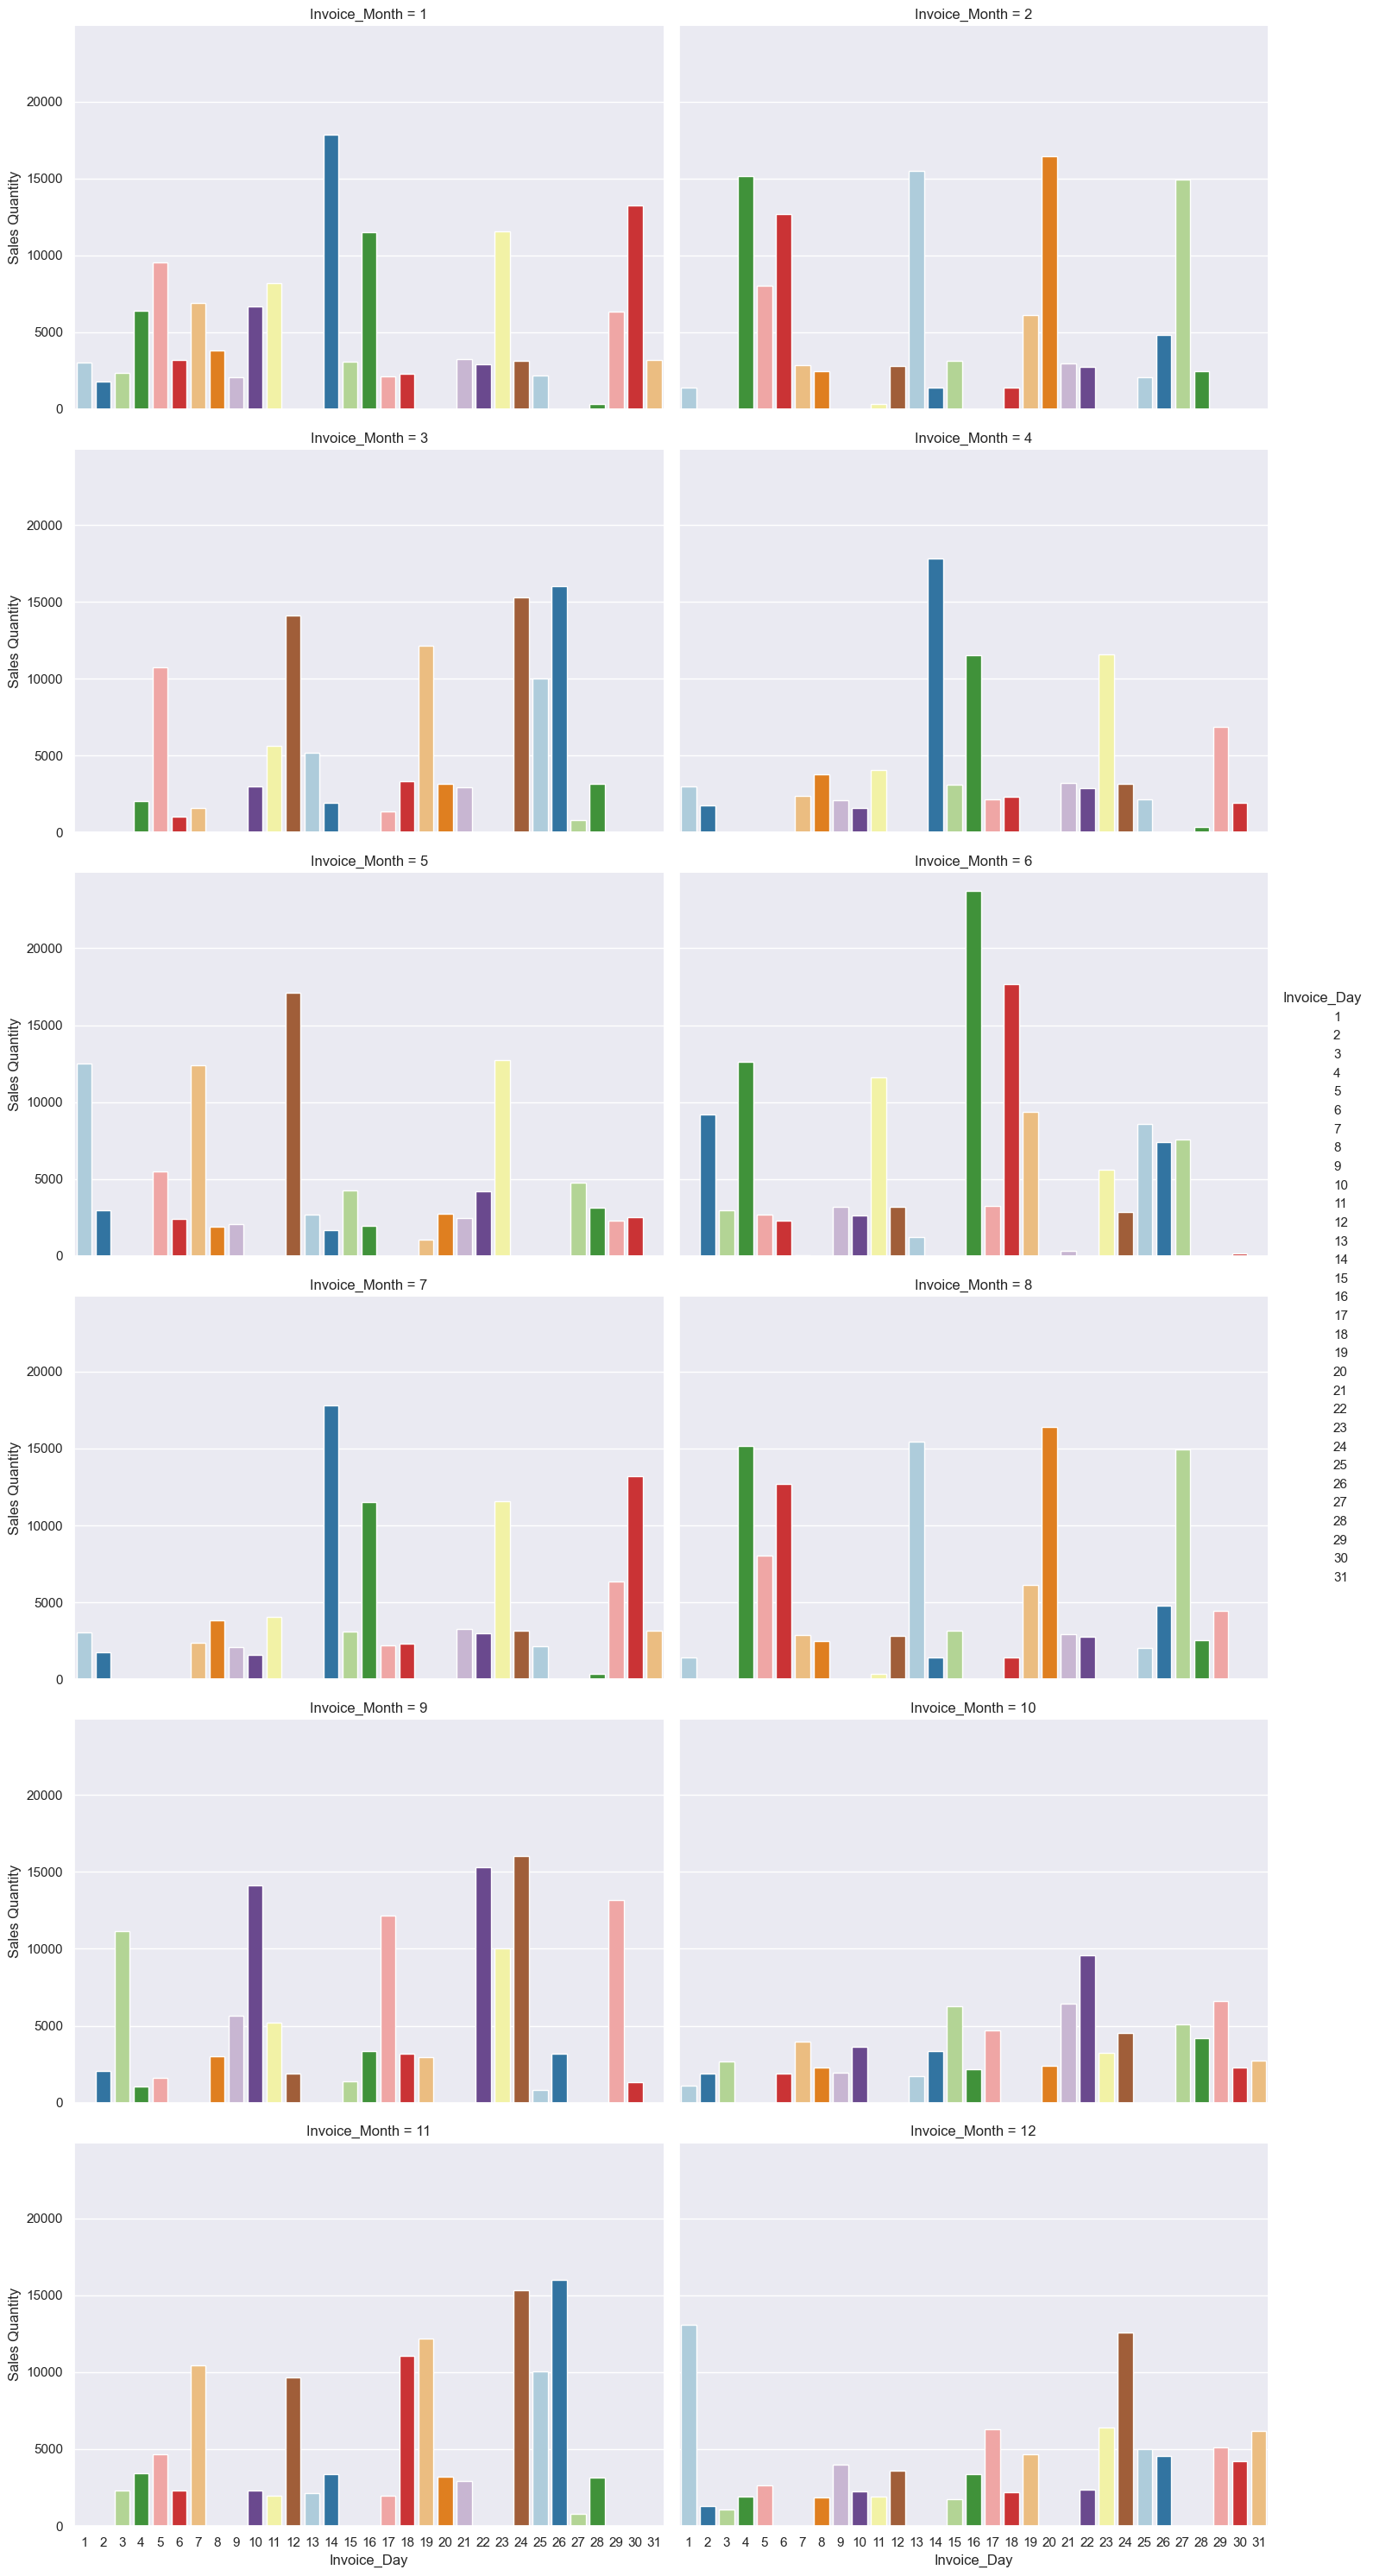

In [42]:
sns.catplot(y = 'Sales Quantity', x = 'Invoice_Day', data = Monthly_rec[Monthly_rec['Invoice_Year'] == 2017], aspect=1.5,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)

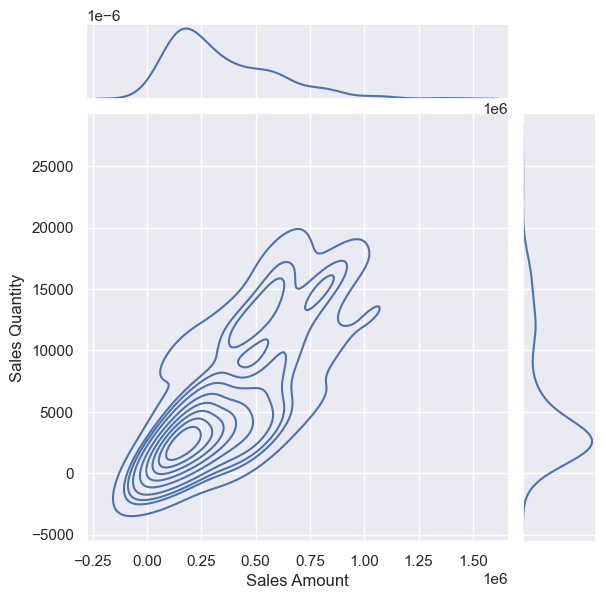

In [43]:
sns.jointplot(x='Sales Amount',y='Sales Quantity',data=Monthly_rec[Monthly_rec['Invoice_Year']==2017],kind='kde')

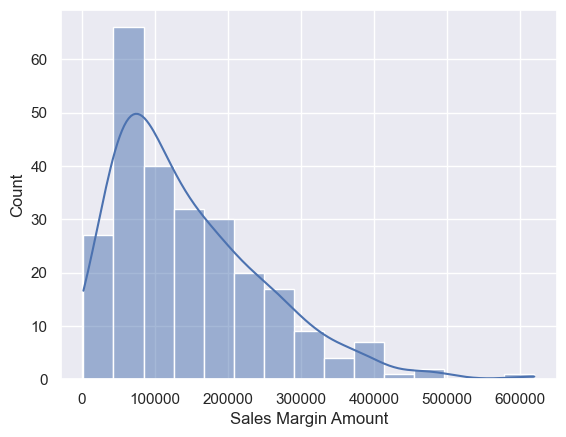

In [48]:
sns.histplot(Monthly_rec.query('Invoice_Year==2017')['Sales Margin Amount'],kde=True)
plt.show()

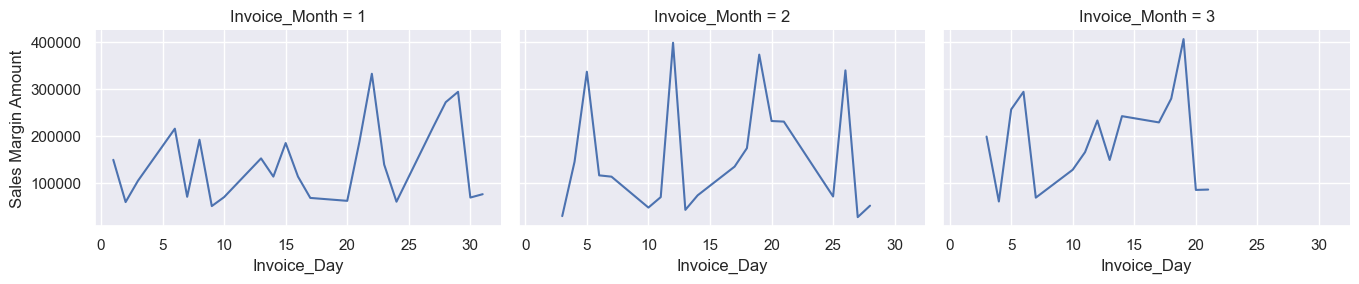

In [49]:
sns.relplot(x='Invoice_Day',y='Sales Margin Amount',data=Monthly_rec.query('Invoice_Year==2018'),
            kind ='line',col='Invoice_Month',col_wrap=4,height=3,aspect=1.5)

## Top 10 records

In [51]:
top_10_2017=Year_Sales[Year_Sales['Invoice_Year']==2017].groupby(['Invoice_Year','Custkey']).sum()
top_10_2017=top_10_2017.sort_values('Sales Margin Amount',ascending=False).reset_index().head(10)
top_10_2017

,Invoice_Year,Custkey,Invoice_Month,Sales Quantity,Sales Amount Based on List Price,Discount Amount,Sales Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
0,2017,10021485,1566,57107,2.255776e+07,1.124389e+07,11313868.49,5176926.16,6136942.33,35866,9.405968e+04,48633.211670
1,2017,10025024,414,363628,9.116391e+06,2.340864e+04,9092981.91,3250809.87,5842172.04,12411,2.517906e+03,2049.734288
2,2017,10025052,78,160801,5.420287e+06,5.626700e+02,5419724.38,1761731.21,3657993.17,1972,1.731450e+03,1168.780000
3,2017,10025919,20380,15868,6.053685e+06,2.837795e+06,3215890.10,1415771.68,1800118.42,297324,1.473376e+06,792226.070657
4,2017,10025241,248,12880,2.337123e+06,1.403950e+03,2335719.12,1267256.40,1068462.72,6815,6.261110e+03,5785.767500
5,2017,10023023,98,14820,1.740224e+06,-4.219000e+04,1782413.74,870216.36,912197.38,2814,1.499954e+03,1274.275083
6,2017,10020184,1498,179244,2.996291e+06,7.400000e-02,2996290.75,843138.90,2153151.85,25992,4.666485e+03,4666.485387
7,2017,10009606,1620,4717,3.543234e+06,1.583711e+06,1959523.63,835041.55,1124482.08,28423,1.718816e+05,95731.714564
8,2017,10012715,9883,9989,3.484824e+06,1.661472e+06,1823351.63,782863.50,1040488.13,255600,5.978799e+05,318734.040770
9,2017,10023715,1279,28625,2.888855e+06,1.452207e+06,1436648.08,729615.06,707033.02,33660,8.053447e+04,41042.475536


,Custkey,Sales Margin Amount
0,10021485,5176926.16
1,10025024,3250809.87
2,10025052,1761731.21
3,10025919,1415771.68
4,10025241,1267256.40
5,10023023,870216.36
6,10020184,843138.90
7,10009606,835041.55
8,10012715,782863.50
9,10023715,729615.06


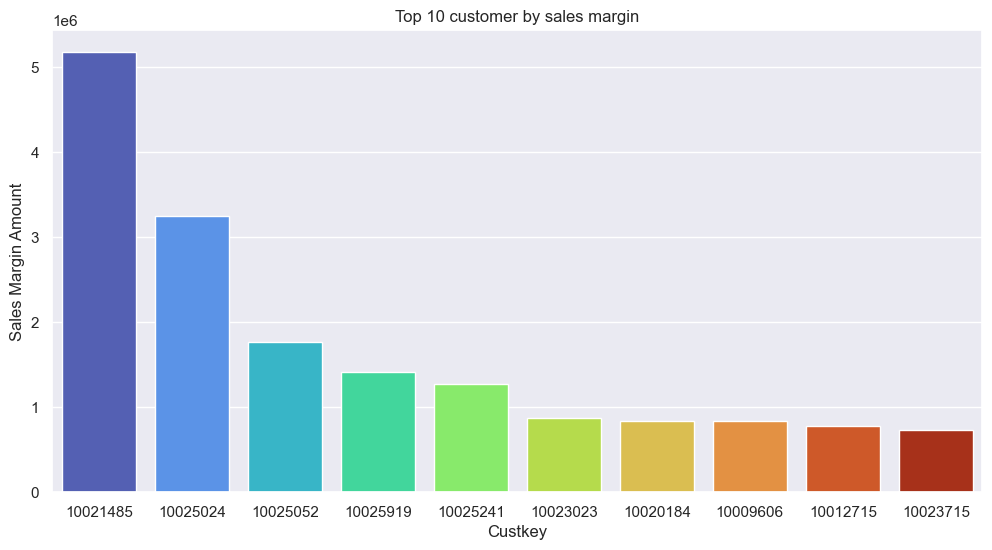

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x='Custkey',y='Sales Margin Amount',data=top_10_2017,palette='turbo',order=top_10_2017.Custkey)
plt.title("Top 10 customer by sales margin")
top_10_2017[['Custkey','Sales Margin Amount']]

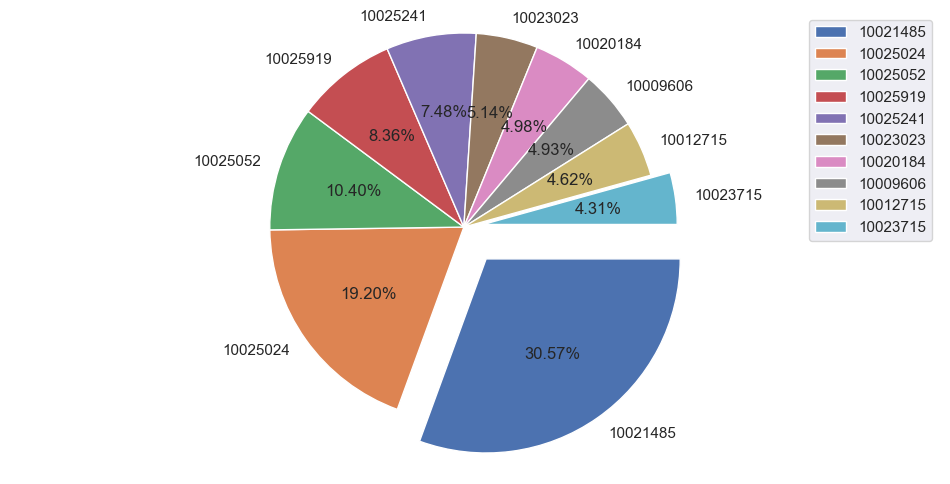

In [57]:
plt.figure(figsize=(12,6))
plt.pie('Sales Margin Amount',labels='Custkey',data=top_10_2017,autopct='%1.2f%%', counterclock=False,explode=(0.2,0,0,0,0,0,0,0,0,0.1))
plt.legend(top_10_2017['Custkey'])
plt.axis('equal')
plt.show()

###  Observations:
* Among the 10 CustKey that generated the most Sales Margin Amount, `CustKey-10021485` contributed around 30.57% of the Sales Margin Amount.

In [62]:
top_10_2018=Year_Sales[Year_Sales['Invoice_Year']==2018].groupby(['Invoice_Year','Custkey']).sum()
top_10_2018=top_10_2018.sort_values('Sales Margin Amount',ascending=False).reset_index().head(10)
top_10_2018

,Invoice_Year,Custkey,Invoice_Month,Sales Quantity,Sales Amount Based on List Price,Discount Amount,Sales Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
0,2018,10025039,110,13597,5.741477e+06,2.918658e+06,2822819.65,1398188.29,1424631.36,8742,23889.4266,11853.668436
1,2018,10002154,42,121176,3.031799e+06,-9.095393e+04,3122752.50,1154085.14,1968667.36,3982,528.3718,544.222949
2,2018,10006919,5,43200,1.455840e+06,-4.367520e+04,1499515.20,509760.00,989755.20,447,101.1000,104.133000
3,2018,10025552,9,5190,8.573617e+05,1.982217e+05,659139.99,332110.69,327029.30,804,633.2030,447.683998
4,2018,10017638,931,2824,9.762193e+05,4.527927e+05,523426.57,233470.15,289956.42,72360,181773.2497,99374.534731
5,2018,10019066,997,2103,8.270525e+05,3.641199e+05,462932.67,207997.56,254935.11,57780,290557.0897,162586.235108
6,2018,10026299,102,7402,7.284792e+05,3.563147e+05,372164.52,195547.06,176617.46,8100,20209.4312,10579.318333
7,2018,10023471,78,37204,6.512000e+05,-1.953597e+04,670735.97,195034.39,475701.58,5472,1020.4480,1051.061388
8,2018,10007183,78,775,6.635133e+05,2.997876e+05,363725.73,162898.91,200826.82,7452,31059.4836,16893.522204
9,2018,10010935,84,918,6.307335e+05,2.847019e+05,346031.58,152253.65,193777.93,6136,31642.9256,17459.916312


,Custkey,Sales Margin Amount
0,10025039,1398188.29
1,10002154,1154085.14
2,10006919,509760.00
3,10025552,332110.69
4,10017638,233470.15
5,10019066,207997.56
6,10026299,195547.06
7,10023471,195034.39
8,10007183,162898.91
9,10010935,152253.65


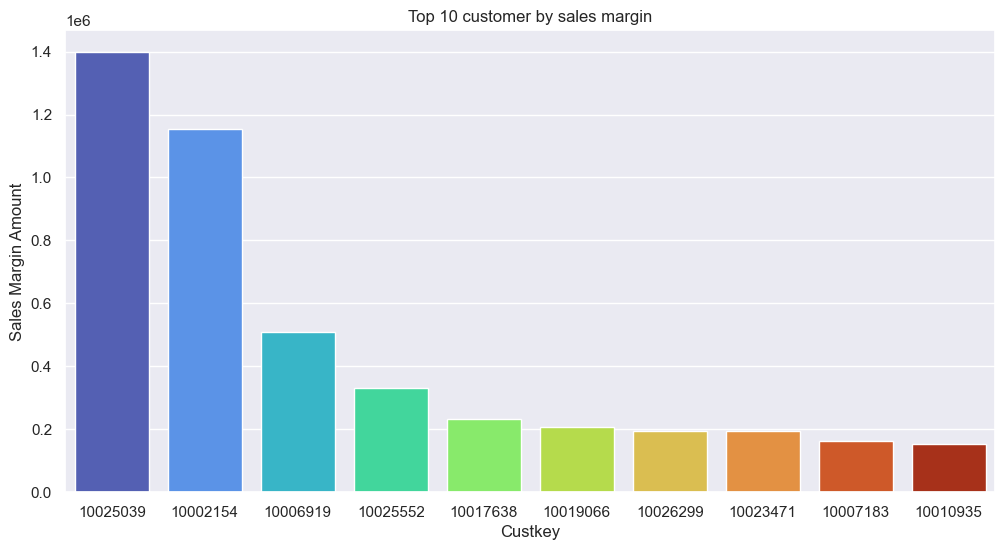

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x='Custkey',y='Sales Margin Amount',data=top_10_2018,palette='turbo',order=top_10_2018.Custkey)
plt.title("Top 10 customer by sales margin")
top_10_2018[['Custkey','Sales Margin Amount']]

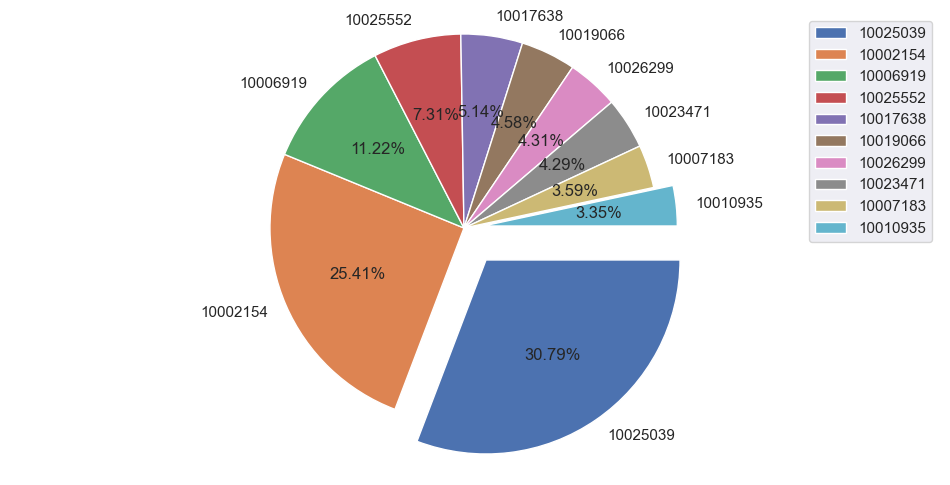

In [70]:
plt.figure(figsize=(12,6))
plt.pie('Sales Margin Amount',labels='Custkey',data=top_10_2018,autopct='%1.2f%%', counterclock=False,explode=(0.2,0,0,0,0,0,0,0,0,0.1))
plt.legend(top_10_2018['Custkey'])
plt.axis('equal')
plt.show()

In [73]:
top_10_2019=Year_Sales[Year_Sales['Invoice_Year']==2019].groupby(['Invoice_Year','Custkey']).sum()
top_10_2019=top_10_2019.sort_values('Sales Margin Amount',ascending=False).reset_index().head(10)
top_10_2019

,Invoice_Year,Custkey,Invoice_Month,Sales Quantity,Sales Amount Based on List Price,Discount Amount,Sales Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
0,2019,10009676,1544,53538,2.111014e+07,1.091322e+07,10196927.89,4473954.12,5722973.77,34122,8.742670e+04,43382.083774
1,2019,10021300,406,358776,8.968179e+06,3.587272e+05,8609451.97,2840289.66,5769162.31,11946,1.583185e+03,1519.857387
2,2019,10025737,81,160800,5.418960e+06,2.167584e+05,5202201.60,1544679.20,3657522.40,1788,4.044000e+02,388.224000
3,2019,10019194,19697,15007,5.736812e+06,2.804732e+06,2932079.97,1221320.93,1710759.04,282096,1.413667e+06,730782.677852
4,2019,10025353,754,12475,2.339978e+06,1.400218e+05,2199956.42,1114700.90,1085255.52,13959,6.168146e+04,35037.974698
5,2019,10025571,109,14820,1.740224e+06,2.910654e+04,1711117.20,798919.82,912197.38,2814,1.499954e+03,1223.304369
6,2019,10026606,1487,173948,2.948812e+06,1.179533e+05,2830859.15,712503.86,2118355.29,25308,4.594070e+03,4410.306561
7,2019,10012226,9809,9804,3.448507e+06,1.716866e+06,1731640.51,702720.45,1028920.06,242820,5.766886e+05,294984.155170
8,2019,10016548,1611,4322,3.214695e+06,1.501559e+06,1713135.79,683579.49,1029556.30,26432,1.565109e+05,84043.086852
9,2019,10004245,1301,26216,2.651670e+06,1.384814e+06,1266855.81,619735.78,647120.03,32040,7.874487e+04,38526.355672


,Custkey,Sales Margin Amount
0,10009676,4473954.12
1,10021300,2840289.66
2,10025737,1544679.20
3,10019194,1221320.93
4,10025353,1114700.90
5,10025571,798919.82
6,10026606,712503.86
7,10012226,702720.45
8,10016548,683579.49
9,10004245,619735.78


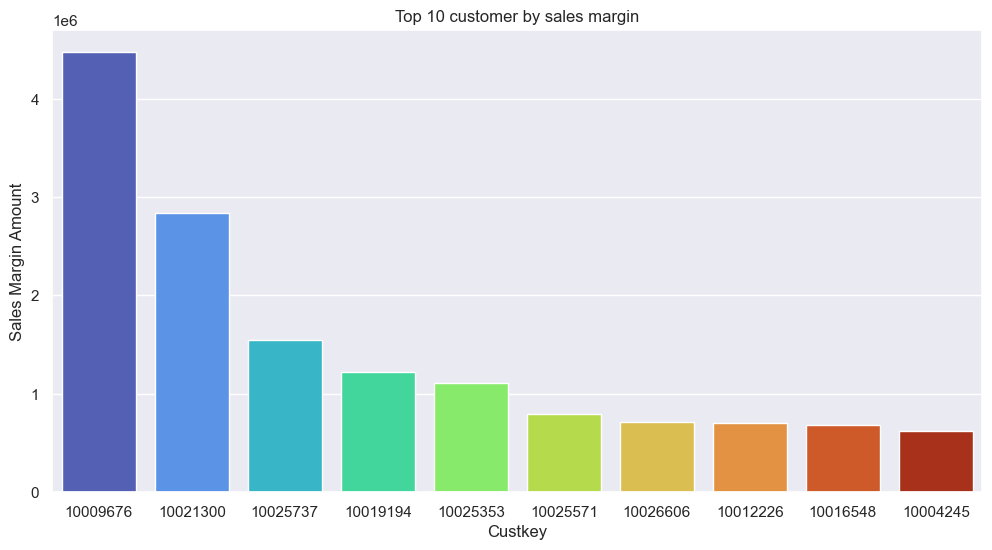

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(x='Custkey',y='Sales Margin Amount',data=top_10_2019,palette='turbo',order=top_10_2019.Custkey)
plt.title("Top 10 customer by sales margin")
top_10_2019[['Custkey','Sales Margin Amount']]

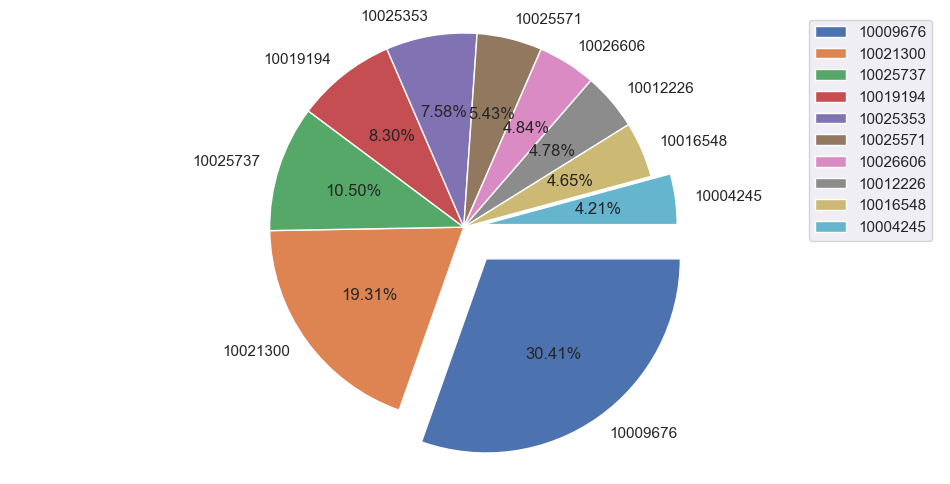

In [75]:
plt.figure(figsize=(12,6))
plt.pie('Sales Margin Amount',labels='Custkey',data=top_10_2019,autopct='%1.2f%%', counterclock=False,explode=(0.2,0,0,0,0,0,0,0,0,0.1))
plt.legend(top_10_2019['Custkey'])
plt.axis('equal')
plt.show()